# 機器學習 - 分類器

## 目錄
- 人工神經網路
- 利用 Iris 資料集訓練感知器

## 人工神經網路 - 感知器 (Perceptron)

In [89]:
import numpy as np

class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        # 學習率 Learning Rate
        self._eta = eta
        # 回合數 Epoch
        self._n_iter = n_iter
        # 隨機狀態
        self._random_state = random_state
        # 權重
        self._weights = None
        # 損失
        self.errors = None
    
    # Fit 模型
    def fit(self, x, y):
        rgen = np.random.RandomState(self._random_state)
        self._weights = rgen.normal(loc=0.0, scale=0.01, size=1 + x.shape[1])
        self.errors = []

        for _ in range(self._n_iter):
            errors = 0
            for xi, target in zip(x, y):
                update = self._eta * (target - self.predict(xi))
                self._weights[1:] += update * xi
                self._weights[0] += update
                errors += int(update != 0.0)
            self.errors.append(errors)
        return self
    
    # 網路輸入
    def net_input(self, x):
        """Calculate net input"""
        return np.dot(x, self._weights[1:]) + self._weights[0]
    
    # 預測
    def predict(self, x):
        """Return class label after unit step"""
        return np.where(self.net_input(x) >= 0.0, 1, -1)

## 利用 Iris 資料集來訓練感知器(Perceptron)

使用網路中的開放資料集，來訓練感知器。

### 讀取 Iris 資料集 (網路)

In [90]:
import pandas as pd

iris_dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(iris_dataset_url,
                 header=None,
                 encoding='utf-8')

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### 讀取 Iris 的資料集 (本地)

In [91]:
df = pd.read_csv("./resources/iris_data.csv", header=None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [92]:
import matplotlib as mlp
from matplotlib.font_manager import fontManager

fontManager.addfont('./resources/NotoSansTC.ttf')
mlp.rc("font", family="Noto Sans TC")

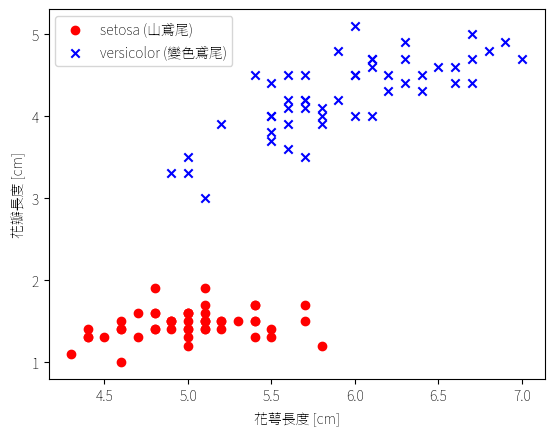

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# 選擇 ‘setosa’ 與 ‘versicolor’
y_label = df.iloc[0:100, 4].values
y_label = np.where(y_label == 'Iris-setosa', -1, 1)

# 提取花萼長度與花瓣長度
x_train = df.iloc[0:100, [0, 2]].values

# 資料繪圖
plt.scatter(x_train[:50, 0], x_train[:50, 1],
            color='red', marker='o', label='setosa (山鳶尾)')
plt.scatter(x_train[50:100, 0], x_train[50:100, 1],
            color='blue', marker='x', label='versicolor (變色鳶尾)')

plt.xlabel('花萼長度 [cm]')
plt.ylabel('花瓣長度 [cm]')
plt.legend(loc='upper left')

plt.show()

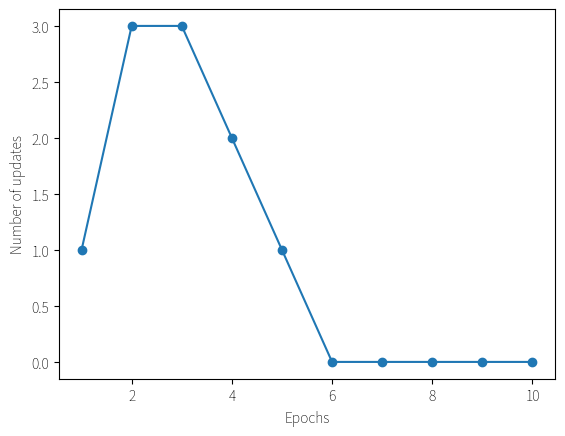

In [94]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(x_train, y_label)

plt.plot(range(1, len(ppn.errors) + 1), ppn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

In [95]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(x, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cl, 0],
                    y=x[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl)

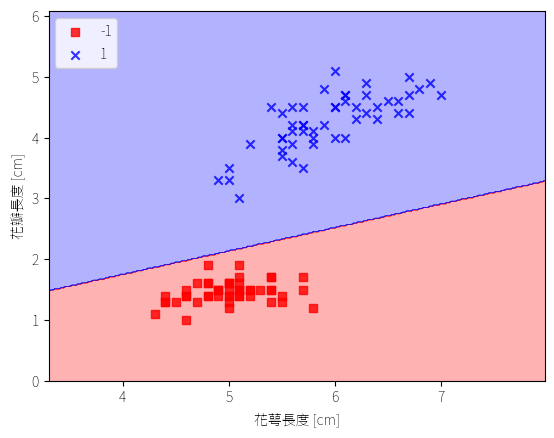

In [96]:
plot_decision_regions(x_train, y_label, classifier=ppn)

plt.xlabel('花萼長度 [cm]')
plt.ylabel('花瓣長度 [cm]')
plt.legend(loc='upper left')

plt.show()